# DataMining - Accidentes de tráfico

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#Leemos el csv
datos = pd.read_csv('C:\master\dataset.csv')
datosLE = pd.read_csv('C:\master\dataset.csv')

In [4]:
datos.head()

GridID        date      Shift  Accident  Longitude.grid  Latitude.grid
0       1  2010-10-08      Night         0            2.08          41.41
1       1  2011-02-16    Morning         0            2.08          41.41
2       1  2014-05-31      Night         0            2.08          41.41
3       1  2011-04-03  Afternoon         0            2.08          41.41
4       1  2013-02-20    Morning         0            2.08          41.41

In [5]:
datos.shape

(824587, 6)

In [6]:
datos.dtypes

GridID              int64
date               object
Shift              object
Accident            int64
Longitude.grid    float64
Latitude.grid     float64
dtype: object

In [7]:
datos['date'] = pd.to_datetime(datos['date'])

In [8]:
datos.dtypes

GridID                     int64
date              datetime64[ns]
Shift                     object
Accident                   int64
Longitude.grid           float64
Latitude.grid            float64
dtype: object

In [9]:
datos["Accident"].value_counts()

0    788070
1     36517
Name: Accident, dtype: int64

In [10]:
datos["Shift"].value_counts()

Afternoon    279847
Morning      277391
Night        267349
Name: Shift, dtype: int64

In [11]:
dummy = pd.get_dummies(datos["Shift"])
dummy.head()

Afternoon  Morning  Night
0          0        0      1
1          0        1      0
2          0        0      1
3          1        0      0
4          0        1      0

In [12]:
datos = pd.concat([datos, dummy], axis=1)
datos.head()

GridID       date      Shift  Accident  Longitude.grid  Latitude.grid  \
0       1 2010-10-08      Night         0            2.08          41.41   
1       1 2011-02-16    Morning         0            2.08          41.41   
2       1 2014-05-31      Night         0            2.08          41.41   
3       1 2011-04-03  Afternoon         0            2.08          41.41   
4       1 2013-02-20    Morning         0            2.08          41.41   

   Afternoon  Morning  Night  
0          0        0      1  
1          0        1      0  
2          0        0      1  
3          1        0      0  
4          0        1      0

In [13]:
datos = datos.drop("Shift", 1)

In [14]:
datos.head()

GridID       date  Accident  Longitude.grid  Latitude.grid  Afternoon  \
0       1 2010-10-08         0            2.08          41.41          0   
1       1 2011-02-16         0            2.08          41.41          0   
2       1 2014-05-31         0            2.08          41.41          0   
3       1 2011-04-03         0            2.08          41.41          1   
4       1 2013-02-20         0            2.08          41.41          0   

   Morning  Night  
0        0      1  
1        1      0  
2        0      1  
3        0      0  
4        1      0

In [15]:
from datetime import datetime, date, time, timedelta
import calendar

In [16]:
Week_Day = []
for fecha in datos['date']:
    dia_semana = datetime.weekday(fecha)+1
    Week_Day.append(dia_semana)
    
datos['Week.Day'] = Week_Day
del Week_Day

In [17]:
datos.head()

GridID       date  Accident  Longitude.grid  Latitude.grid  Afternoon  \
0       1 2010-10-08         0            2.08          41.41          0   
1       1 2011-02-16         0            2.08          41.41          0   
2       1 2014-05-31         0            2.08          41.41          0   
3       1 2011-04-03         0            2.08          41.41          1   
4       1 2013-02-20         0            2.08          41.41          0   

   Morning  Night  Week.Day  
0        0      1         5  
1        1      0         3  
2        0      1         6  
3        0      0         7  
4        1      0         3

In [18]:
festivos = ('1-1','6-1','19-4','22-4','1-05','10-6','24-6','15-8','11-9','24-9','12-10','1-11','6-12','25-12','26-12')

In [19]:
festive = []
for fecha in datos['date']:
    pasat = False
    for festivo in festivos:
        aux = festivo.split("-")
        aux2 = datetime.strftime(fecha, '%Y-%m-%d').split("-")
        if ( (aux2[1] == aux[1]) and (aux2[2] == aux[0]) and (pasat == False) ):
            festive.append(1)
            pasat = True
    if (pasat == False):
        festive.append(0)

In [20]:
datos['Festive'] = festive
del festive
del festivos

In [21]:
datos['Festive'].value_counts()

0    817881
1      6706
Name: Festive, dtype: int64

In [22]:
datos.head()

GridID       date  Accident  Longitude.grid  Latitude.grid  Afternoon  \
0       1 2010-10-08         0            2.08          41.41          0   
1       1 2011-02-16         0            2.08          41.41          0   
2       1 2014-05-31         0            2.08          41.41          0   
3       1 2011-04-03         0            2.08          41.41          1   
4       1 2013-02-20         0            2.08          41.41          0   

   Morning  Night  Week.Day  Festive  
0        0      1         5        0  
1        1      0         3        0  
2        0      1         6        0  
3        0      0         7        0  
4        1      0         3        0

In [23]:
weekend = []
for dia in datos['Week.Day']:
    if dia > 5:
        weekend.append(1)
    else:
        weekend.append(0)
    
datos['Weekend'] = weekend
del weekend

In [24]:
datos['Weekend'].value_counts()

0    591925
1    232662
Name: Weekend, dtype: int64

In [25]:
datos.head()

GridID       date  Accident  Longitude.grid  Latitude.grid  Afternoon  \
0       1 2010-10-08         0            2.08          41.41          0   
1       1 2011-02-16         0            2.08          41.41          0   
2       1 2014-05-31         0            2.08          41.41          0   
3       1 2011-04-03         0            2.08          41.41          1   
4       1 2013-02-20         0            2.08          41.41          0   

   Morning  Night  Week.Day  Festive  Weekend  
0        0      1         5        0        0  
1        1      0         3        0        0  
2        0      1         6        0        1  
3        0      0         7        0        1  
4        1      0         3        0        0

# Árbol decisiones

In [26]:
X = datos.drop("Accident",1)
X = X.drop("date",1)

In [27]:
y = datos["Accident"]

In [28]:
print(X.shape)
print(y.shape)

(824587, 9)
(824587,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)

In [30]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(577210, 9)
(247377, 9)
(577210,)
(247377,)


In [31]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [32]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [33]:
y_train_pred = DTC.predict_proba(X_train)

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8846932383960083 Árbol de decisión - Datos de entrenamiento


In [36]:
y_test_pred = DTC.predict_proba(X_test)

In [37]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7319214775738814 Árbol de decisión - Datos de test


# Arboles de decision Validación Cruzada

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
print(cross_val_score(DTC, X_train, y_train, cv=5, scoring='roc_auc'))

[0.71835306 0.71559596 0.72050872 0.71561632 0.72097091]


In [40]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8846932383960083 Árbol de decisión - Datos de entrenamiento


In [41]:
print(cross_val_score(DTC, X_train, y_train, cv=5, scoring='roc_auc').mean(), "Árbol de decisión - Datos de validación")

0.7182089934631197 Árbol de decisión - Datos de validación


In [42]:
DTC.tree_.max_depth

38

# Sobreajuste

In [43]:
import matplotlib.pyplot as plt

In [44]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

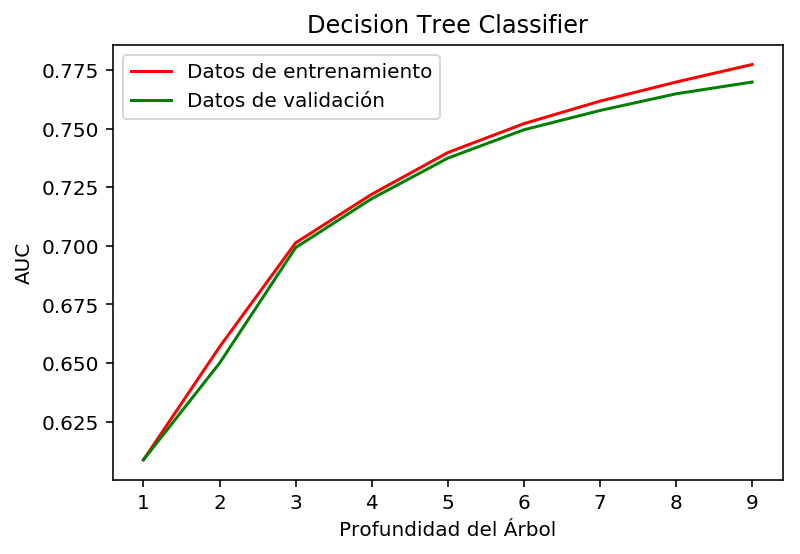

In [45]:
train_scores = []
val_scores = []
max_deep_list = list(range(1, 10))
for c in max_deep_list:
    DTC = DecisionTreeClassifier(max_depth=c, criterion='entropy', random_state=1)
    DTC.fit(X_train, y_train)
    y_train_pred = DTC.predict_proba(X_train)
    train_scores.append(roc_auc_score(y_train, y_train_pred[:, 1]))
    val_scores.append(cross_val_score(DTC, X_train, y_train, cv=5, scoring='roc_auc').mean())
    
plt.plot(max_deep_list, train_scores, color='r', label='Datos de entrenamiento')
plt.plot(max_deep_list, val_scores, color='g', label='Datos de validación')
plt.title('Decision Tree Classifier')
plt.legend()
plt.ylabel('AUC')
plt.xlabel('Profundidad del Árbol')
plt.show()

In [46]:
DTC = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=1)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [47]:
y_train_pred = DTC.predict_proba(X_train)
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.7012712238337478 Árbol de decisión - Datos de entrenamiento


In [48]:
y_test_pred = DTC.predict_proba(X_test)
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7004399234269616 Árbol de decisión - Datos de test


# RandomSearch

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [50]:
DTC = DecisionTreeClassifier(random_state=1)

In [52]:
parametros = dict(max_depth=[1,2,3,4,5,6,7,8,9,10,20,30,40,50], min_samples_leaf=[1,2,3,4,5,6,7,8,9,10,20,30,40,50])
RS = RandomizedSearchCV(DTC, param_distributions=parametros, n_iter=100, cv=5, n_jobs=-1, verbose=1, random_state=1)

In [53]:
RS.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [54]:
RS.best_score_

0.9557162904315587

In [55]:
RS.best_params_

{'min_samples_leaf': 30, 'max_depth': 20}

# LabelEncoder Shift

In [56]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(datosLE["Shift"])

LabelEncoder()

In [57]:
list(LE.classes_)
datosLE["Shift"] = LE.transform(datosLE["Shift"])
datosLE["Shift"].value_counts()

0    279847
1    277391
2    267349
Name: Shift, dtype: int64

In [58]:
datosLE.head()

GridID        date  Shift  Accident  Longitude.grid  Latitude.grid
0       1  2010-10-08      2         0            2.08          41.41
1       1  2011-02-16      1         0            2.08          41.41
2       1  2014-05-31      2         0            2.08          41.41
3       1  2011-04-03      0         0            2.08          41.41
4       1  2013-02-20      1         0            2.08          41.41

# Árbol decisiones - Label Encoder Shift

In [59]:
X = datosLE.drop("Accident",1)
X = X.drop("date",1)

In [60]:
y = datosLE["Accident"]

In [61]:
print(X.shape)
print(y.shape)

(824587, 4)
(824587,)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)

In [63]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(577210, 4)
(247377, 4)
(577210,)
(247377,)


In [64]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [65]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [66]:
y_train_pred = DTC.predict_proba(X_train)

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8213526334477538 Árbol de decisión - Datos de entrenamiento


In [69]:
y_test_pred = DTC.predict_proba(X_test)

In [70]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7923023419575098 Árbol de decisión - Datos de test


#Obtenemos mejor resultado en TEST con Shift como labelEncoder, no realizaremos mas pruebas con sobreajustes.